In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Assignment 5.1 : Integration using Monte-Carlo methods

Integrating $$f(x)=\frac{1}{1+x^2}$$ i) without a weight and 
ii) with the weight $\omega(x)$ = $\frac{1}{3}(4-2x)$.

In [2]:
def fn(x): #defining function to be integrated f(x) = 1/(1+x^2)
    return(1/((x**2)+1))

In [3]:
def fx(y): # invering the integral of the weight function to write x = x(y), where y = integral(w(x)dx)
    return(2 - np.sqrt(4-3*y))

In [4]:
def weight(x): #weight function w(x) = (4-2x)/3
    return(4/3 - 2*x/3)

In [7]:
def mc_without_w(f,N): # function for integrating (averaging) the function f without any weight
    sum1 = 0
    sum2 = 0
    for i in range(N):
        x = np.random.uniform()
        f1 = f(x)
        sum1 += f1
        sum2 += f1**2
        
    f_avg = sum1/N #function value obtained by averaging
    f2_avg = sum2/N #
    sigma = np.sqrt((1/N)*(f2_avg - f_avg**2)) # standard deviation
    return(f_avg,sigma)

In [8]:
N_ = np.array([10,20,50,100,200,500,1000,2000,5000]) # array with varying number of iterations for the average

In [9]:
def mc_with_w(N): # function for integrating (averaging) the function f with the weight w(x)
    sum1 = 0
    sum2 = 0
    for i in range(N):
        y = np.random.uniform()
        x = fx(y)
        f = fn(x)/weight(x)
        sum1 += f
        sum2 += f**2
        
    f_avg = sum1/N
    f2_avg = sum2/N
    sigma = np.sqrt((1/N)*(f2_avg - f_avg**2))
    return(f_avg,sigma)

In [10]:
#len(N_) = 9
#making a table for the integral values and standard deviations for each element in N_,for integrations 
#without and with the weight
I_without = np.zeros(9)
sigma_without = np.zeros(9)
I_with = np.zeros(9)
sigma_with = np.zeros(9)
for k in range(9):
    w_without = mc_without_w(fn,N_[k])
    I_without[k] = w_without[0]
    sigma_without[k] = w_without[1]
    w_with = mc_with_w(N_[k])
    I_with[k] = w_with[0]
    sigma_with[k] = w_with[1]


Table with the value of the integral obtained, for varying number of iterations, with and without the weight

In [57]:
print(" ","N","  ","I without weight","  ","sigma without weight","  ","I with weight","    ","sigma without weight")
print()
for i in range(9):
    print(N_[i]," ",I_without[i]," ",sigma_without[i]," ",I_with[i]," ",sigma_with[i])

  N    I without weight    sigma without weight    I with weight      sigma without weight

10   0.8298415889077863   0.04884344708746003   0.7985905808539157   0.0027346131985618687
20   0.7422532261464029   0.037985916727794874   0.7895192507273642   0.004397128666597394
50   0.7584170314072773   0.022058729436856054   0.7805947188274364   0.0029611447949541582
100   0.7735055997550065   0.016665068262127256   0.7861187837163546   0.0021061311071172
200   0.7654069105480822   0.011615912948154323   0.7874730665129005   0.001350695883000192
500   0.7908875067149499   0.0072484203266406045   0.7853556757190108   0.0008753719435594353
1000   0.783824740513951   0.005095058117292304   0.7852141046364673   0.0006283165552755901
2000   0.7897547662023701   0.0036500655352597364   0.7858229872516338   0.000439798790775442
5000   0.7874307171736518   0.0022683392073427266   0.7849785641438087   0.0002852855590952073


# Assignment 5.2: Integration using Metropolis Algorithm

Using the algorithm of Metropolis et al. to sample the normal distribution in one dimension : $e^{-x^2/2}$ for various trial step sizes, to study the acceptance ratio (fraction of trial steps accepted), the correlation function (and hence the appropriate sampling frequency), and the over all computational efficiency. Using the random variables generated, to calculate $$\int_{\infty}^{\infty}x^2e^{-x^2/2}$$

In [3]:
def gaus_wt(x): # gaussian weight function w(x) = exp(-x^2/2)/sqrt(2pi)
    return(np.exp(-(x**2)/2)/np.sqrt(2*np.pi))

In [4]:
def g(x): # the function to be averaged, f(x) = x^2/sqrt(2*pi), taking normalisation into consideration
    return((x**2)*np.sqrt(2*np.pi))

In [5]:
def sub_metrop(x,wt,delta,w): # metropolis subroutine to generate gaussian distributeed random variables.
    temp = np.random.uniform()
    if temp < 0.5:
        xt= x - delta
    else:
        xt= x + delta
    
    #x2t = x2 + 2*(np.random.uniform() - 1)
    w1 = wt(xt)
    r = w1/w
    flag = 0
    if (r > np.random.uniform()):
        flag=1
        return(xt,w1,flag)
    else:
        return(x,w,flag)

Defining the correlation function as $$C(k) = \frac{(<f(i)f(i+k)> - <f(i)>^2)}{(<f(i)^2> - <f(i)>^2)}$$, where $<f(i)f(i+k)> = (1/N-k)\sum_{i=1}^{N-k} (f(X_i)f(X_i+k))$ as defined below:

In [6]:
def avg_fn(k,ar1,f):  
    n = len(ar1)
    avg = 0
    
    for i in range(n-k):
        avg += f(ar1[i])*f(ar1[i+k])
    return(avg/(n-k))

In [7]:
def corr(k,arr,f): 
    #function to calculate correlation as a function of k
    n = len(arr)
    avg1 = avg_fn(k,arr,f)
    avg2 = np.sum(f(arr))/n
    avg3 = np.sum(f(arr)**2)/n
    return((avg1 - avg2**2)/(avg3-avg2**2))

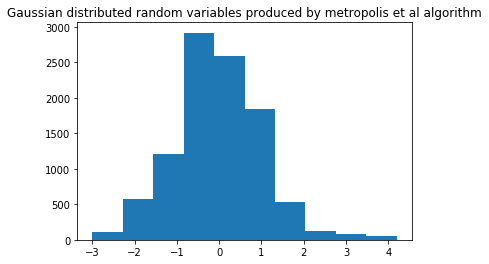

In [32]:
x0 = 0 #generating normal distributed random variables 
ar = np.zeros(10000)
W = gaus_wt(x0)
acc_r =0
for i in range(10000):
    X = sub_metrop(x0,gaus_wt,0.2,W)
    x0 = X[0]
    W = X[1]
    acc_r += X[2]
    ar[i] = x0
    #print(x0,W)
#print(acc_r/10000)
plt.hist(ar)
plt.title("Gaussian distributed random variables produced by metropolis et al algorithm")
plt.show()

In [14]:
def metrop(X0,step,no_steps): 
    #metropolis algorithm for generating normally distributed points with step length
    # "step" for "no_of_steps" interations
    x0 = X0
    ar = np.zeros(no_steps)
    W = gaus_wt(x0)
    acc_r =0
    for i in range(no_steps):
        X = sub_metrop(x0,gaus_wt,step,W)
        x0 = X[0]
        W = X[1]
        acc_r += X[2]
        ar[i] = x0
    return(acc_r/no_steps,ar)

In [18]:
#Studying the effect of varying the step length as given in the "stp" array below, for 10000 interations
X0 = 0 #initial postion of the walker
stp = np.array([0.01,0.03,0.1,0.3,1,3]) #steplengths
l = len(stp)
r = np.zeros(l)
cor_ = np.zeros((l,100)) #correlation array, for k = 0 - 100 steps apart
integral_val = np.zeros(l) #value of the integral calculated 
efficiency = np.zeros(l) # efficiency : how much the calculated integral varies from the actual analtically 
# calculated value of sqrt(2*np.pi)
for k in range(l):
    m = metrop(X0,stp[k],10000)
    r[k] = m[0]
    integral_val[k] = sum(g(m[1]))/10000
    efficiency[k] = np.sqrt(2*np.pi) - integral_val[k]
    for i in range(100):
        cor_[k][i] = corr(i,m[1],g)
    

### Plotting calculated values

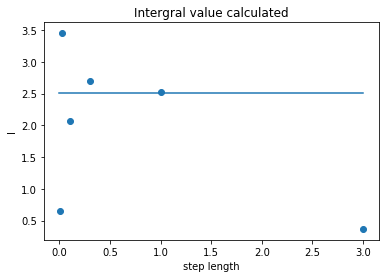

In [23]:
plt.scatter(stp,integral_val) #integral value
plt.plot([np.sqrt(2*np.pi)]*4)
plt.title("Intergral value calculated")
plt.xlabel("step length")
plt.ylabel("I")
plt.show()

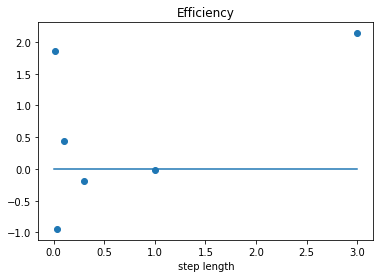

In [24]:
plt.scatter(stp,efficiency) #efficiency
plt.plot(np.zeros(4))
plt.title("Efficiency")
plt.xlabel("step length")
plt.show()

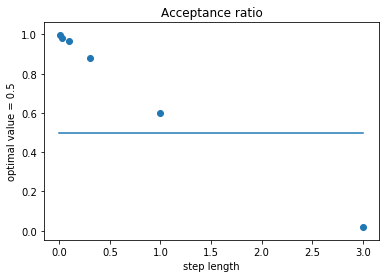

In [25]:
plt.scatter(stp,r) #acceptance ratio
plt.plot([0.5]*4)
plt.title("Acceptance ratio")
plt.xlabel("step length")
plt.ylabel("optimal value = 0.5")
plt.show()

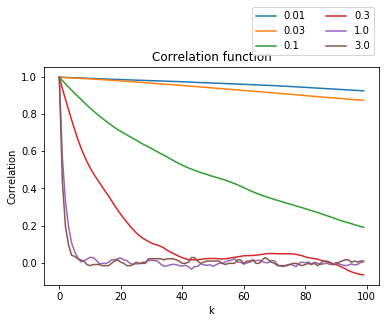

In [22]:
# correlation length 
for i in range(l):
    plt.plot(cor_[i])
plt.legend(stp,bbox_to_anchor =(1, 1.3), ncol = 2)
plt.title("Correlation function")
plt.xlabel("k")
plt.ylabel("Correlation")
plt.show()

As we can see in the above graphs, the intergal value, efficiency and acceptance ratios are the most optimum when the step lenght is 1 unit. The correlation between steps reduces rapidly to zero for step length of 1 unit.

Using the optimal step length of 1 unit, studying the variation produced by changing the initial position of the walker

In [26]:
#variation with initial position of walker
X0_1 = np.array([0,0.1,0.3,1]) #inital position values
#stp = np.array([0.01,0.03,0.1,0.3,1,3])
l1 = len(X0_1)
r1 = np.zeros(l1)
cor1_ = np.zeros((l1,100))
integral_val1 = np.zeros(l1)
efficiency1 = np.zeros(l1)
for k in range(l1):
    m = metrop(X0_1[k],1,10000)
    r1[k] = m[0]
    integral_val1[k] = sum(g(m[1]))/10000
    efficiency1[k] = np.sqrt(2*np.pi) - integral_val1[k]
    for i in range(100):
        cor1_[k][i] = corr(i,m[1],g)

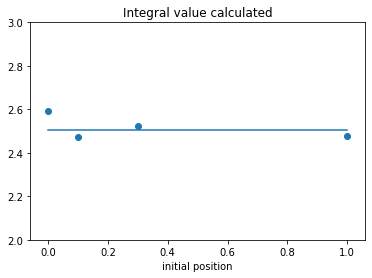

In [27]:
plt.scatter(X0_1,integral_val1)
plt.plot([np.sqrt(2*np.pi)]*2)
plt.ylim(2,3)
plt.title("Integral value calculated")
plt.xlabel("initial position")
#plt.ylabel("Correlation")
plt.show()

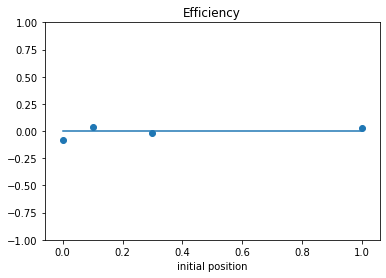

In [28]:
plt.scatter(X0_1,efficiency1)
plt.plot(np.zeros(2))
plt.ylim(-1,1)
plt.title("Efficiency")
plt.xlabel("initial position")
plt.show()

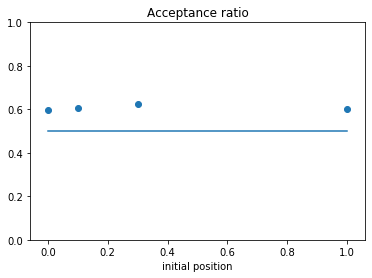

In [29]:
plt.scatter(X0_1,r1) #acceptance ratio
plt.plot([0.5]*2)
plt.ylim(0,1)
plt.title("Acceptance ratio")
plt.xlabel("initial position")
plt.show()

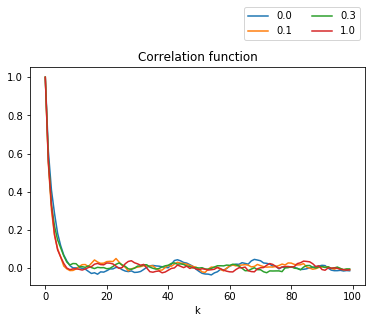

In [30]:
for i in range(l1):
    plt.plot(cor1_[i])
plt.legend(X0_1,bbox_to_anchor =(1, 1.3), ncol = 2)
plt.title("Correlation function")
plt.xlabel("k")
plt.show()

As we can see above, no significant variation is produced by changing the initial position of the walker